In [45]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [46]:
df=pd.read_csv('people (1).csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [48]:
df.columns
list(df.columns)

['satisfactoryLevel',
 'lastEvaluation',
 'numberOfProjects',
 'avgMonthlyHours',
 'timeSpent.company',
 'workAccident',
 'left',
 'promotionInLast5years',
 'dept',
 'salary']

In [49]:
df['timeSpent.company']

0        3
1        6
2        4
3        3
4        3
        ..
14994    4
14995    2
14996    4
14997    5
14998    3
Name: timeSpent.company, Length: 14999, dtype: int64

In [50]:
df.rename(columns={'timeSpent.company':'timeSpent_company'},inplace=True)
#OR:  df=df.rename(columns={'timeSpent.company':'timeSpent_company'})

In [51]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [52]:
df.shape

(14999, 10)

In [53]:
df.isnull().sum()
#OR: df.isna().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [54]:
df.duplicated().sum()

3008

In [55]:
dup=df[df.duplicated(keep='first')]
dup

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [56]:
df=df.drop_duplicates(keep='first')

In [57]:
df.shape

(11991, 10)

In [58]:
df.duplicated().sum()

0

In [59]:
df.describe()   #only works for numerical column
#use (include=all) this gives-unique,top(mode),freq(number of times repeated)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##Normality Test:
Check whether the data is normally distributed or not in satisfactory level column using Shapiro-Wilk test

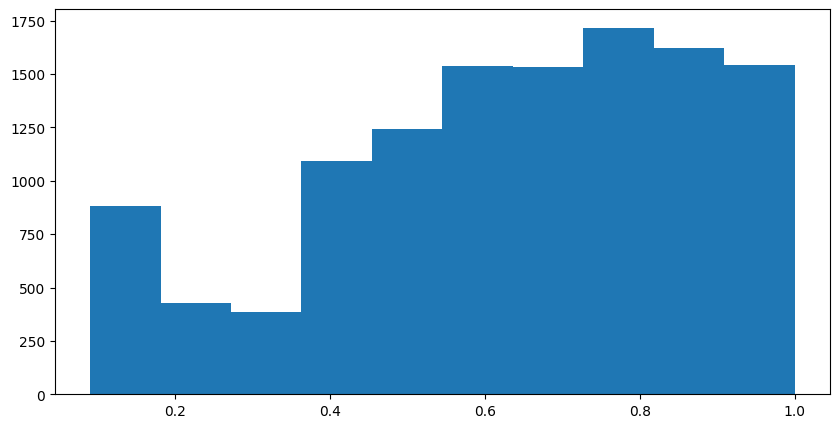

In [60]:
plt.figure(figsize=(10,5))
plt.hist(df['satisfactoryLevel'])
plt.show()

From above graph it is observed that data is not normally distributed. This can be confirmed by performing the Shapiro-Wilk test

h0(null hypothesis): data is normally distributed

h1(alternate hypothesis): data is not normally distributed

In [61]:
from scipy.stats import shapiro
stat,p_value=shapiro(df['satisfactoryLevel'])
p_value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

p-value(0) is less than 0.05 , hence reject the null hypothesis. This indicates that data is not normally distributed

In [62]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [63]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [64]:
df1=df

In [65]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1['salary']=l1.fit_transform(df1['salary'])
df1.head()
#to convert categorical to numerical data. changed from low,medium,high to 1,2,3

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [66]:
l1=LabelEncoder()
df1['dept']=l1.fit_transform(df1['dept'])
df1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,3,1
14995,0.99,0.83,4,274,2,0,0,0,7,1
14996,0.72,0.72,4,175,4,0,0,0,9,1
14997,0.24,0.91,5,177,5,0,0,0,7,1


In [67]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
dept,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


<Axes: >

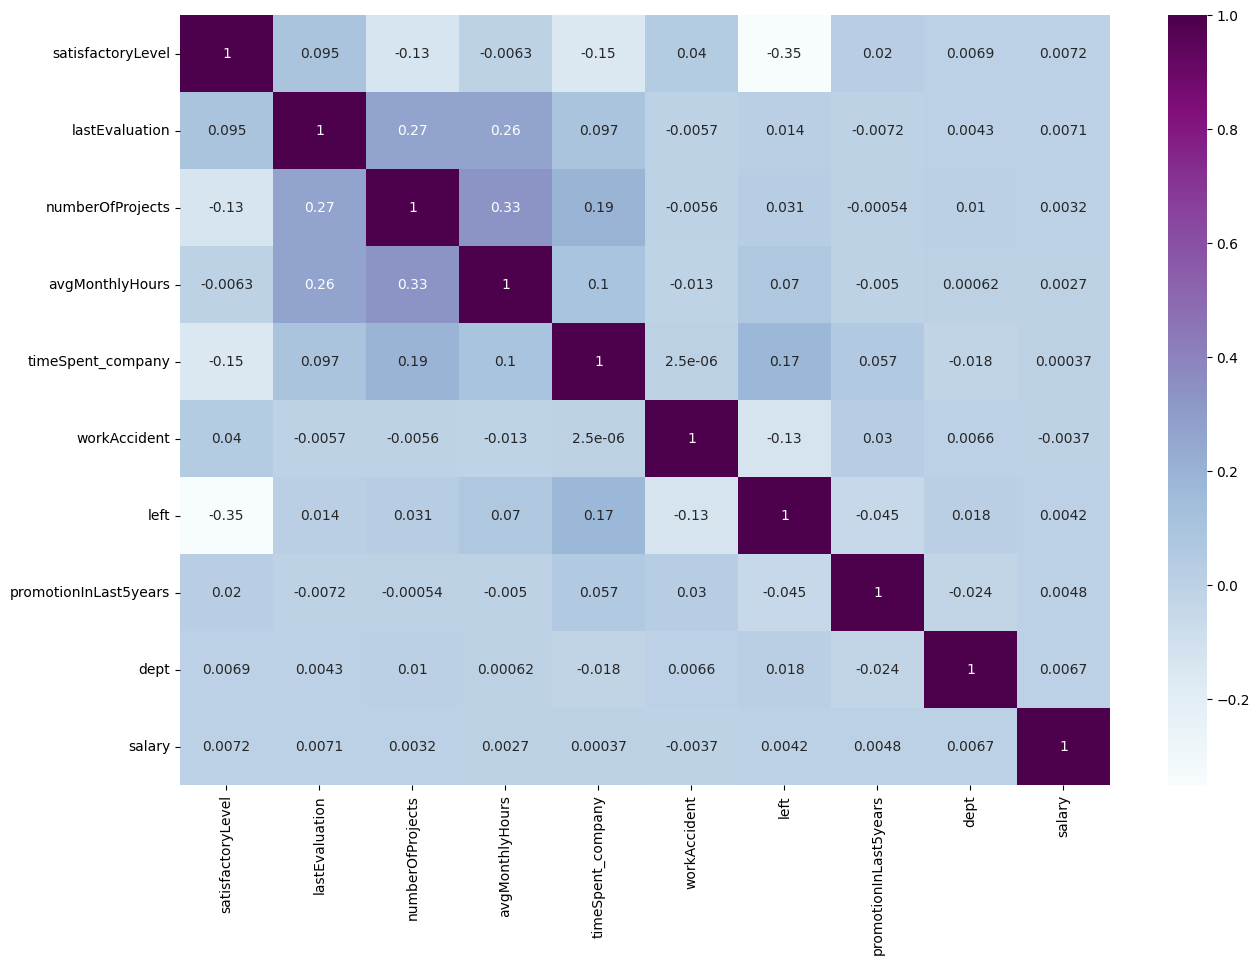

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='BuPu')

In [69]:
#Random Experiment
emp=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [70]:
emp

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2
...,...,...,...,...,...,...,...,...,...,...
14685,0.39,0.48,3,190,2,0,0,0,9,1
14835,0.50,0.90,4,171,2,0,0,0,3,1
14840,0.13,0.97,3,156,2,0,0,0,8,2
14855,0.45,0.41,3,193,2,1,0,0,7,1


In [71]:
emp['left'].value_counts()

0    211
1      6
Name: left, dtype: int64

In [72]:
emp['avgMonthlyHours'].mean()

167.2258064516129

T-Test

Used to determine if there is a significant difference between the means of 2 groups

One Sample t-test

It tells us that whether the means of the sample and the population are same or not

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200

In [74]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
7,0.42,0.53,2,142,3,0,1,0,7,1
8,0.45,0.54,2,135,3,0,1,0,7,1


In [76]:
employee.shape

(1462, 10)

h0 Null hypothesis -   167 hrs

h1 Alternate hypothesis - avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee


In [77]:
# selecting random sample
sample_size = 100
sample1 = employee.sample(sample_size,random_state=0)
sample1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1685,0.17,0.76,4,171,5,0,0,0,6,1
11633,0.46,0.46,2,145,3,0,1,0,0,0
1250,0.45,0.53,2,159,3,0,1,0,7,1
774,0.45,0.49,2,144,3,0,1,0,2,1
3506,0.50,0.38,5,175,4,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
27,0.38,0.46,2,137,3,0,1,0,9,1
6314,0.37,0.72,2,163,3,0,0,0,7,1
2083,0.45,0.39,2,167,3,0,0,0,8,2
5162,0.12,0.39,5,161,4,0,0,0,0,1


In [79]:
#population mean
pos_mean = 167

In [80]:
# sample mean
print(sample1["avgMonthlyHours"].mean())

154.2


In [81]:
from scipy.stats import ttest_1samp
statistics, p_value = ttest_1samp(sample1["avgMonthlyHours"],pos_mean)
print(statistics,p_value)

-6.812850056008294 7.534573793907689e-10


In [82]:
# degree of freedom
n = len(employee["avgMonthlyHours"])
dof = n-1
print(n,dof)

1462 1461


In [83]:
#df=99
alpha = 0.05
from scipy.stats import t
cv = t.ppf([alpha/2,1-alpha/2],dof)
print(cv)

[-1.96158904  1.96158904]


Test statistics dosen't lie in critical value region,hence we will reject the null hypothesis

p_value is less than 0.05, hence we will reject the null hypothesis

The percentage of employee leaving the company is 3% having experience of 2 years. Is it same for employees having more than 2 years experience?

In [84]:
# Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs
# Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs
from statsmodels.stats.proportion import proportions_ztest
sample_size == 100

True

In [85]:
sample1 = employee.sample(sample_size,random_state=0)
count = sample1["left"].value_counts()
count

1    63
0    37
Name: left, dtype: int64

In [86]:
nobs = len(sample1["left"])
nobs

100

In [88]:
p0 = 0.03
statistic_oneprop,pvalue_oneprop = proportions_ztest(count = count,nobs=nobs,alternative="two-sided",prop_var=False)
print(statistic_oneprop,pvalue_oneprop)

3.6769552621700474 0.00023603441652934854


p-value is less than 0.05, reject the null hypothesis

Percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs

Two-sample t-test

Compare the means of the two independent groups

Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?

In [89]:
e1 = df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2 = df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]
e1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
5,0.10,0.77,6,247,4,0,1,0,7,1


In [90]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,7,2
13,0.78,0.99,4,255,6,0,1,0,7,1
26,0.84,0.87,4,246,6,0,1,0,3,1
33,0.57,0.70,3,273,6,0,1,0,8,1
63,0.90,1.00,5,221,6,0,1,0,7,2


In [91]:
e1.shape

(11167, 10)

In [92]:
e2.shape

(824, 10)

In [93]:
s1 = e1.sample(200,random_state=0)
s2 = e2.sample(200,random_state=0)
import scipy
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

p-value is greater than 0.05, accept the null hypothesis

Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs